In [1]:
from data_processing_functions import *

In [52]:
bl_path = "/home/jens/masterData/AlgorithmTuner/TunedParameters/BL/bl_5_5_AlgorithmTunerData-data.csv"
lr_path = "/home/jens/masterData/AlgorithmTuner/TunedParameters/LR/lr_5_5_noglob_AlgorithmTunerData-data.csv"
lr_glob_path = "/home/jens/masterData/AlgorithmTuner/TunedParameters/LR/lr_5_5_AlgorithmTunerData-data.csv"
bo_i_path = "/home/jens/masterData/AlgorithmTuner/TunedParameters/BO/bo_5_5_individual_AlgorithmTunerData-data.csv"
bo_i_glob_path = "/home/jens/masterData/AlgorithmTuner/TunedParameters/BO/bo_5_5_individual_global_AlgorithmTunerData-data.csv"
bo_all_path = "/home/jens/masterData/AlgorithmTuner/TunedParameters/BO/bo_5_5_all_AlgorithmTunerData-data.csv"
bo_all_glob_path = "/home/jens/masterData/AlgorithmTuner/TunedParameters/BO/bo_5_5_all_global_AlgorithmTunerData-data.csv"
bo_all_glob_t_path = "/home/jens/masterData/AlgorithmTuner/TunedParameters/BO/bo_5_5_all_global_intercept_tuned_AlgorithmTunerData-data.csv"

# paths = [bl_path,lr_path,bo_i_path,bo_all_path,lr_glob_path,bo_i_glob_path,bo_all_glob_path,bo_all_glob_t_path]
# labels = ["BL","LR","GA_I","GA_A","LR_G","GA_I_G","GA_A_G","GA_A_G_T"]
paths = [bl_path,lr_glob_path,bo_i_glob_path,bo_all_glob_path,bo_all_glob_t_path]
labels = ["BL","LR_I_G","GA_I_G","GA_A_G","GA_A_G_T"]

In [53]:
def read_and_calc_performance(path):
    df = pd.read_csv(path, usecols = ["algName","objName","geName","tp","tn","fp","fn"], dtype = {"algName":"category","objName":"category","geName":"category"})
    df = df[df["objName"].isin(["AngleTubes","Ears","Gameboys"])]
    df["objName"].cat.remove_unused_categories(inplace=True)
    df =  df.groupby(["algName","objName"]).sum().reset_index()
    df["precision"]=df["tp"]/(df["tp"]+df["fp"])
    df["recall"]=df["tp"]/(df["tp"]+df["fn"])
    df["f1"]=2*df["tp"]/(2*df["tp"]+df["fn"]+df["fp"])
    df["accuracy"]=(df["tp"]+df["tn"])/(df["tp"]+df["tn"]+df["fp"]+df["fn"])
    return df

In [54]:
dfs = []
for path, label in zip(paths,labels):
    df = read_and_calc_performance(path)
    df["label"] = [label for i in range(df.shape[0])]
    dfs.append(df)

df_comb = pd.concat(dfs)
df_comb[["label","f1","precision","recall","accuracy"]]

/home/jens/.virtualenvs/master/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


,label,f1,precision,recall,accuracy
0,BL,0.807062,0.720721,0.916905,0.726786
1,BL,0.546512,0.465347,0.661972,0.715328
2,BL,0.640000,0.701754,0.588235,0.764398
0,LR_I_G,0.829268,0.786632,0.876791,0.775000
1,LR_I_G,0.813793,0.797297,0.830986,0.901460
2,LR_I_G,0.660870,0.808511,0.558824,0.795812
0,GA_I_G,0.813926,0.700413,0.971347,0.723214
1,GA_I_G,0.743902,0.655914,0.859155,0.846715
2,GA_I_G,0.701299,0.627907,0.794118,0.759162
0,GA_A_G,0.816176,0.713062,0.954155,0.732143


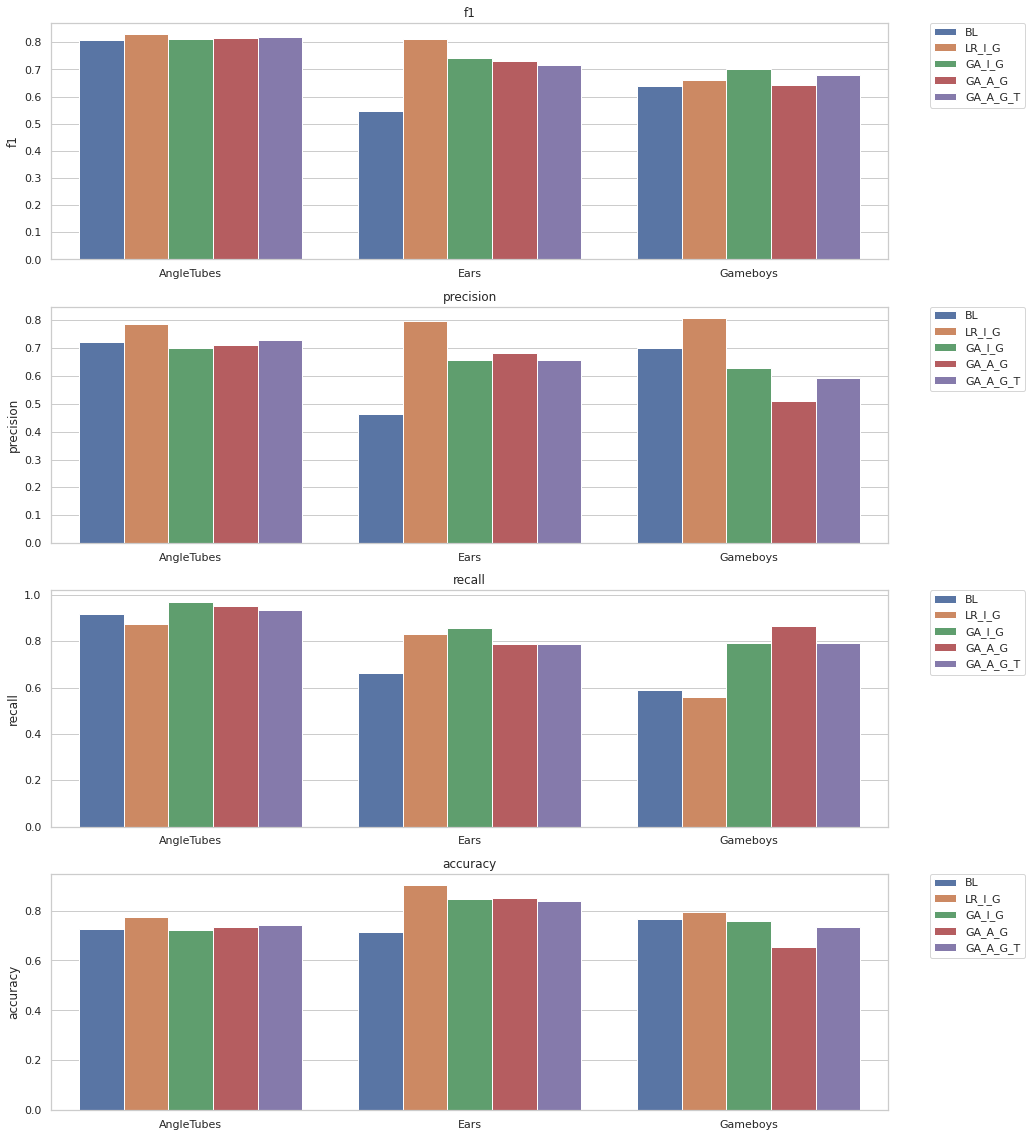

In [55]:
validation_measures = ["f1","precision","recall","accuracy"]

fig,axes = plt.subplots(len(validation_measures),1,figsize=(15,len(validation_measures)*5),sharey="row")
sns.set_theme(style="whitegrid")
for ax,vm in zip(axes,validation_measures):
    sns.barplot(x="objName",y=vm,hue="label",data=df_comb,ax=ax)
    ax.set_title(vm)
    ax.set_xlabel("")
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    
